<a href="https://colab.research.google.com/github/poring3995/My_Project/blob/main/Stock_Price_Prediction_and_Strategy_using_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ติดตั้ง library ที่จำเป็น**

In [ ]:
!pip install pandas_ta
!pip install sklearn
#!pip install quandl
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=3e4797820755eebeadc82af85c0260e0ea626ce410d314badfba480d3b55e6a3
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import yfinance as yf
import pandas_ta as ta
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, LSTM
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import plotly.express as px


# **ดึงข้อมูลด้วยการใช้ Yahoo finance API (กรณี datasource รูปแบบแรก)**

In [ ]:

# get historical pricing data
df = yf.Ticker('CPALL.BK')
df = df.history(period='60mo')
df = df.reset_index()
df['Date'] = df['Date'].dt.tz_localize(None)


In [ ]:
#import quandl
#quandl.ApiConfig.api_key = 'YOUR_API_KEY'
#df = quandl.get('AOT.BK', start_date='2021-01-01', end_date='2021-12-31')


In [ ]:
#from alpha_vantage.timeseries import TimeSeries
#import pandas as pd

#api_key = 'YOUR_API_KEY'
#ts = TimeSeries(key=api_key, output_format='pandas')
#data, meta_data = ts.get_daily(symbol='AOT.BK', outputsize='full')


In [ ]:
# df = df.sample(withReplacement=True, fraction=0.85, seed=123)
# df.info()
# df

# **ดึงข้อมูลผ่านรูปแบบไฟล์ csv (data source รูปแบบที่ 2)**




In [ ]:
#df = pd.read_csv("BA.BK")

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-08-30,63.475161,63.475161,62.558552,62.787704,28669500,0.0,0.0
1,2018-08-31,62.329406,62.558558,61.641949,61.871101,48435200,0.0,0.0
2,2018-09-03,61.871094,62.787703,61.871094,62.100246,30739800,0.0,0.0
3,2018-09-04,62.100253,62.329405,61.412796,61.412796,30379500,0.0,0.0
4,2018-09-05,61.183641,61.412793,59.350423,59.808727,104984900,0.0,0.0
...,...,...,...,...,...,...,...,...
1208,2023-08-24,66.250000,66.250000,65.000000,65.500000,25046800,0.0,0.0
1209,2023-08-25,65.500000,65.750000,64.500000,65.500000,17563100,0.0,0.0
1210,2023-08-28,66.000000,66.000000,65.250000,65.250000,12537800,0.0,0.0
1211,2023-08-29,65.250000,66.000000,65.250000,65.750000,13970000,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1213 non-null   datetime64[ns]
 1   Open          1213 non-null   float64       
 2   High          1213 non-null   float64       
 3   Low           1213 non-null   float64       
 4   Close         1213 non-null   float64       
 5   Volume        1213 non-null   int64         
 6   Dividends     1213 non-null   float64       
 7   Stock Splits  1213 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 75.9 KB


# **Data Preprocessing**

In [ ]:
df.dropna()#case NAN

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-08-30,63.475161,63.475161,62.558552,62.787704,28669500,0.0,0.0
1,2018-08-31,62.329406,62.558558,61.641949,61.871101,48435200,0.0,0.0
2,2018-09-03,61.871094,62.787703,61.871094,62.100246,30739800,0.0,0.0
3,2018-09-04,62.100253,62.329405,61.412796,61.412796,30379500,0.0,0.0
4,2018-09-05,61.183641,61.412793,59.350423,59.808727,104984900,0.0,0.0
...,...,...,...,...,...,...,...,...
1208,2023-08-24,66.250000,66.250000,65.000000,65.500000,25046800,0.0,0.0
1209,2023-08-25,65.500000,65.750000,64.500000,65.500000,17563100,0.0,0.0
1210,2023-08-28,66.000000,66.000000,65.250000,65.250000,12537800,0.0,0.0
1211,2023-08-29,65.250000,66.000000,65.250000,65.750000,13970000,0.0,0.0


In [ ]:
df = df.drop(columns = ['Dividends','Stock Splits','Volume'])
df

,Date,Open,High,Low,Close
0,2018-08-30,63.475161,63.475161,62.558552,62.787704
1,2018-08-31,62.329406,62.558558,61.641949,61.871101
2,2018-09-03,61.871094,62.787703,61.871094,62.100246
3,2018-09-04,62.100253,62.329405,61.412796,61.412796
4,2018-09-05,61.183641,61.412793,59.350423,59.808727
...,...,...,...,...,...
1208,2023-08-24,66.250000,66.250000,65.000000,65.500000
1209,2023-08-25,65.500000,65.750000,64.500000,65.500000
1210,2023-08-28,66.000000,66.000000,65.250000,65.250000
1211,2023-08-29,65.250000,66.000000,65.250000,65.750000


In [ ]:
ema_periods = [12, 26]  # You can adjust these periods as needed

# Calculate EMA for each period
for period in ema_periods:
    df[f'EMA_{period}'] = df['Close'].ewm(span=period, min_periods=1, adjust=False).mean()


In [ ]:
df

,Date,Open,High,Low,Close,EMA_12,EMA_26
0,2018-08-30,63.475161,63.475161,62.558552,62.787704,62.787704,62.787704
1,2018-08-31,62.329406,62.558558,61.641949,61.871101,62.646689,62.719808
2,2018-09-03,61.871094,62.787703,61.871094,62.100246,62.562621,62.673914
3,2018-09-04,62.100253,62.329405,61.412796,61.412796,62.385724,62.580498
4,2018-09-05,61.183641,61.412793,59.350423,59.808727,61.989263,62.375182
...,...,...,...,...,...,...,...
1208,2023-08-24,66.250000,66.250000,65.000000,65.500000,63.163399,62.617924
1209,2023-08-25,65.500000,65.750000,64.500000,65.500000,63.522876,62.831411
1210,2023-08-28,66.000000,66.000000,65.250000,65.250000,63.788588,63.010566
1211,2023-08-29,65.250000,66.000000,65.250000,65.750000,64.090343,63.213487


# **Data check (Visualize)**

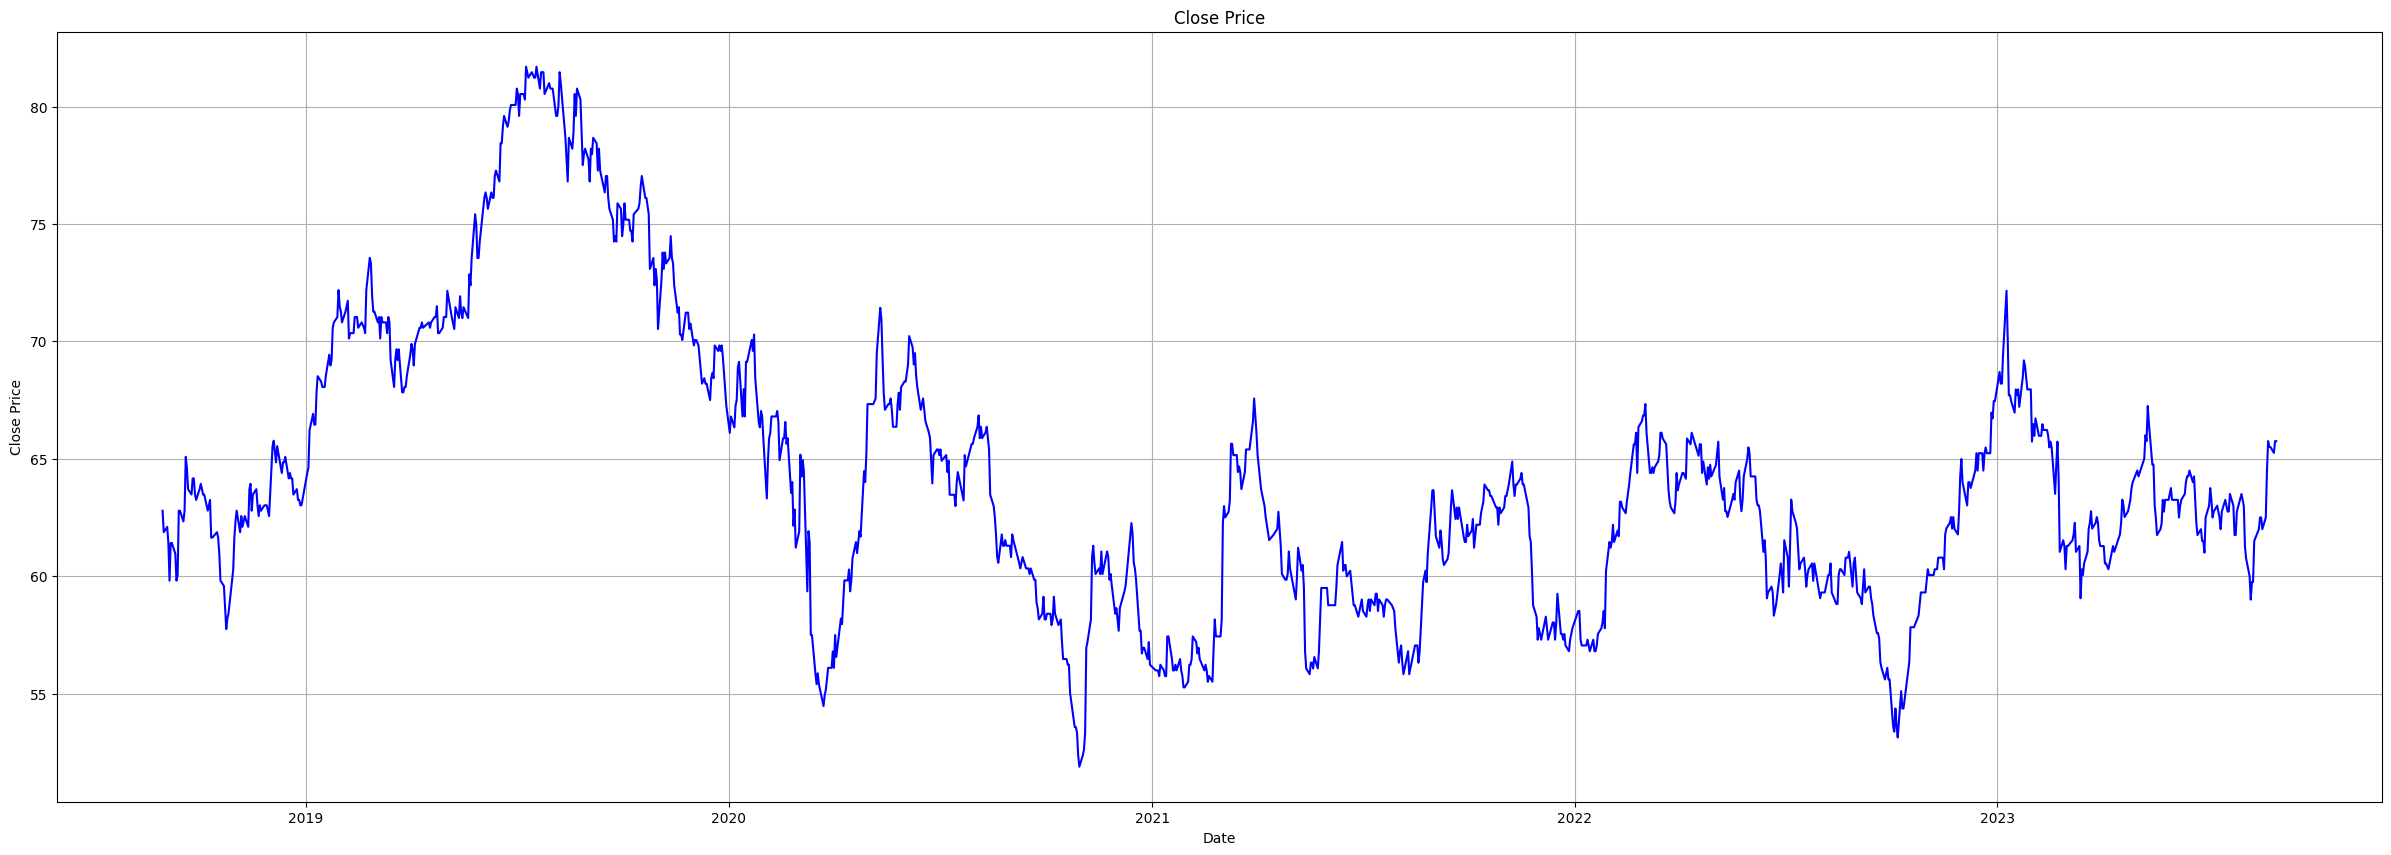

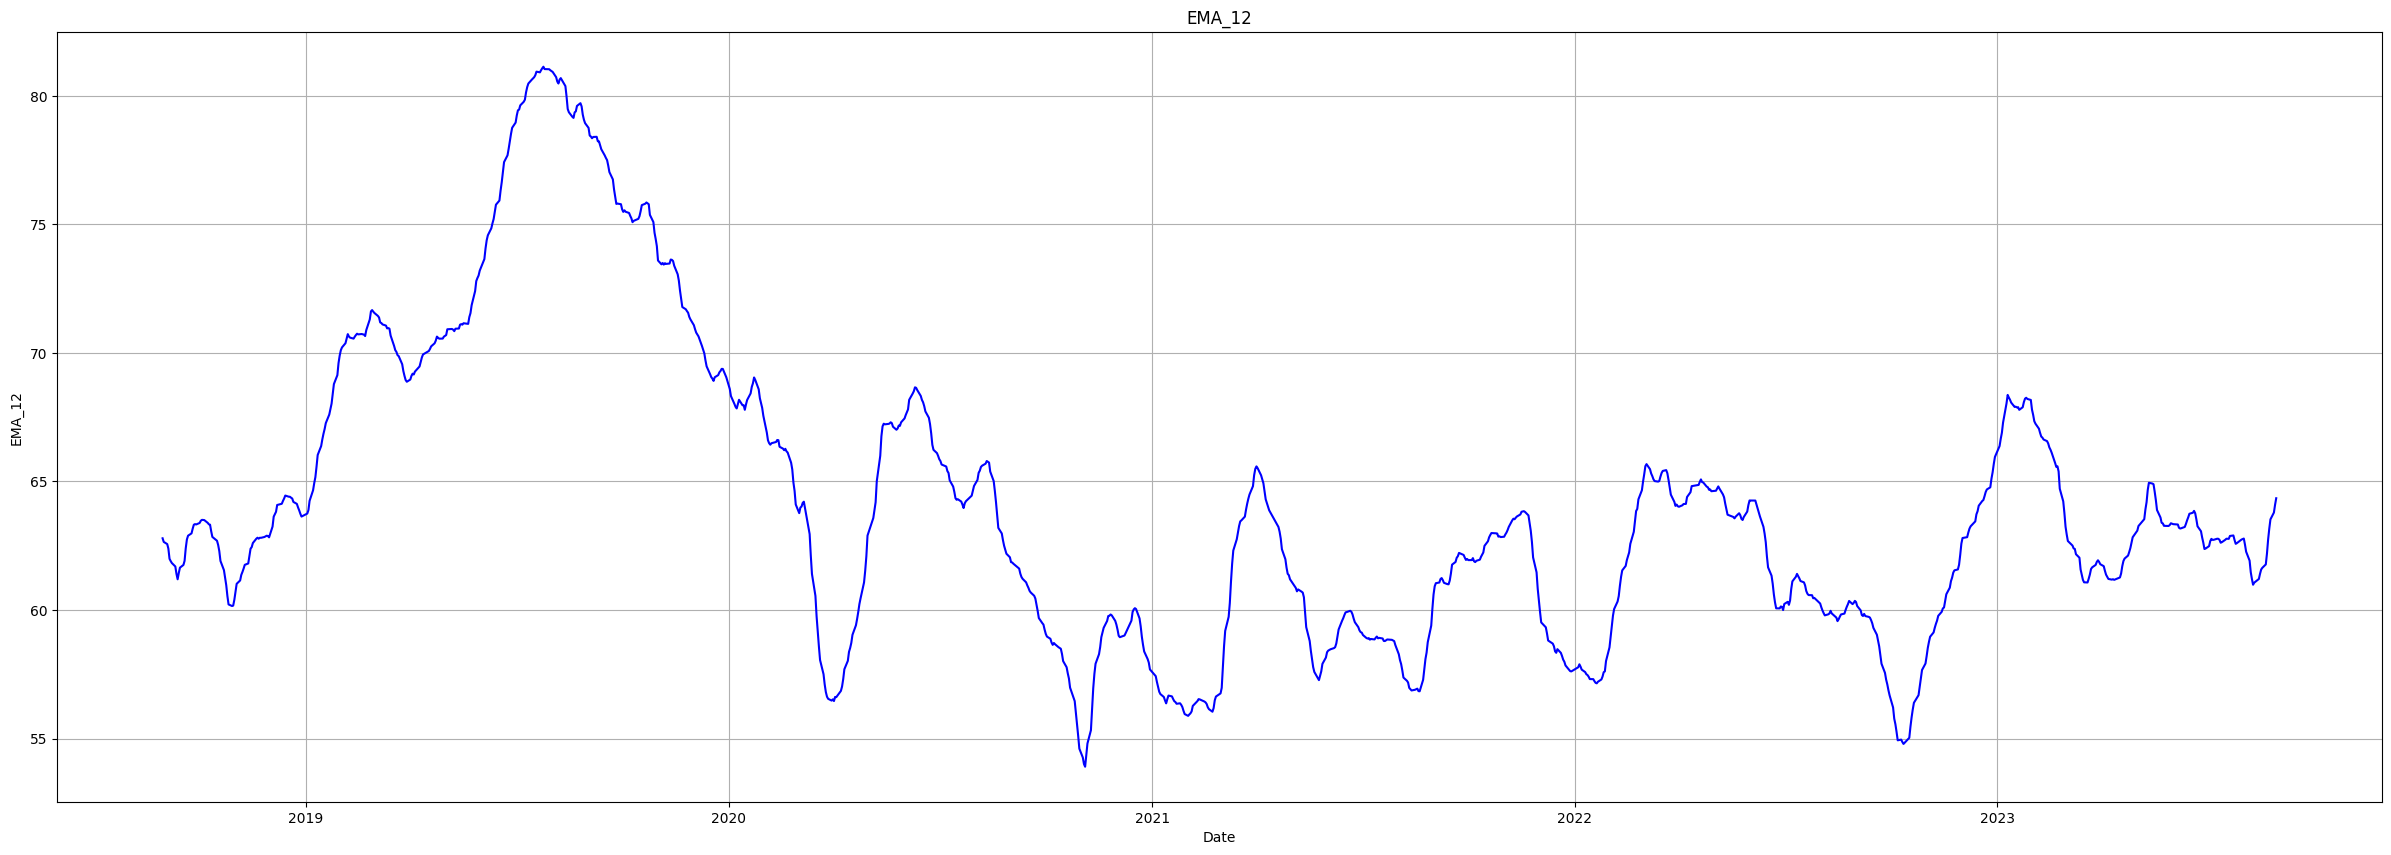

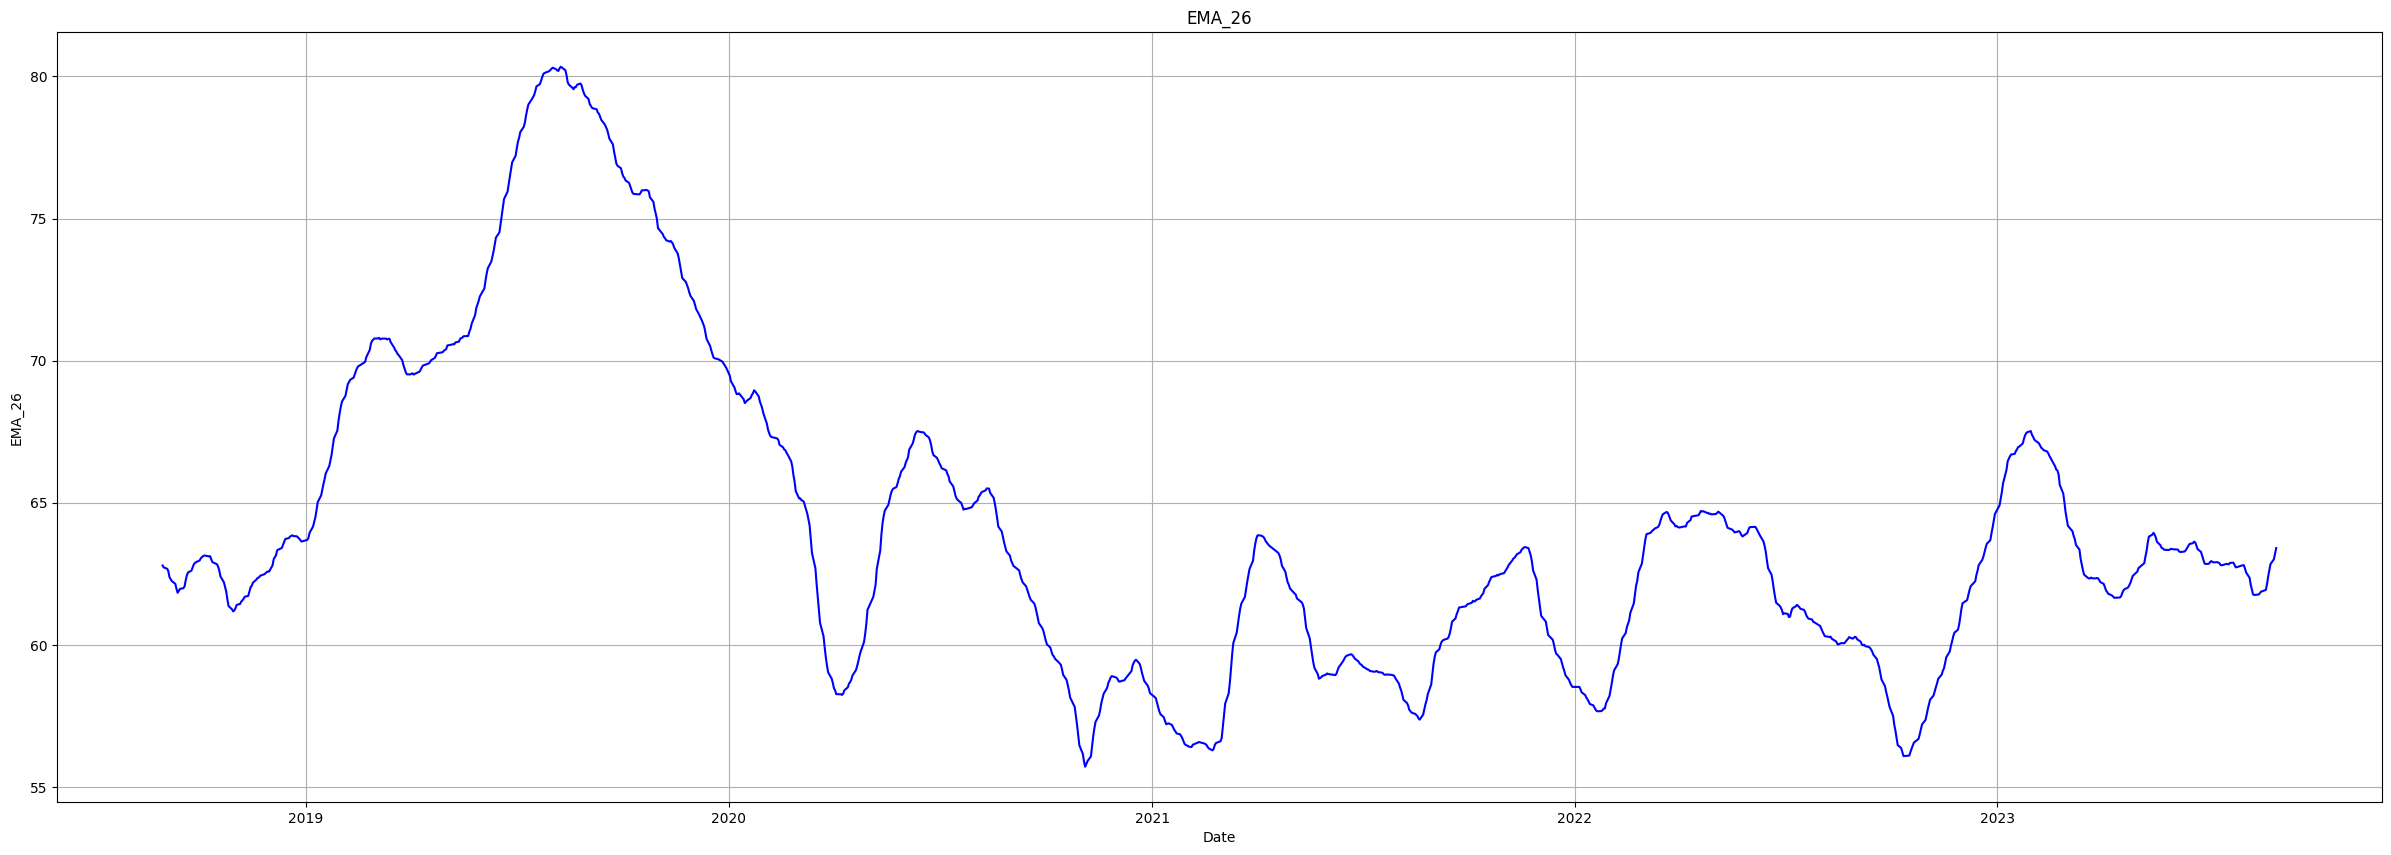

In [ ]:


# Create a single plot for Close Price
plt.figure(figsize=(30, 10))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

plt.figure(figsize=(30, 10))
plt.plot(df['Date'], df['EMA_12'], color='blue')
plt.title('EMA_12')
plt.xlabel('Date')
plt.ylabel('EMA_12')
plt.grid(True)

plt.figure(figsize=(30, 10))
plt.plot(df['Date'], df['EMA_26'], color='blue')
plt.title('EMA_26')
plt.xlabel('Date')
plt.ylabel('EMA_26')
plt.grid(True)



plt.show()


# **Training and Testing Part**

Epoch 1/50
29/29 [==============================] - 24s 261ms/step - loss: 0.0510
Epoch 2/50
29/29 [==============================] - 6s 214ms/step - loss: 0.0134
Epoch 3/50
29/29 [==============================] - 6s 191ms/step - loss: 0.0110
Epoch 4/50
29/29 [==============================] - 3s 102ms/step - loss: 0.0097
Epoch 5/50
29/29 [==============================] - 3s 101ms/step - loss: 0.0085
Epoch 6/50
29/29 [==============================] - 3s 104ms/step - loss: 0.0082
Epoch 7/50
29/29 [==============================] - 4s 152ms/step - loss: 0.0074
Epoch 8/50
29/29 [==============================] - 3s 99ms/step - loss: 0.0076
Epoch 9/50
29/29 [==============================] - 3s 102ms/step - loss: 0.0069
Epoch 10/50
29/29 [==============================] - 3s 102ms/step - loss: 0.0066
Epoch 11/50
29/29 [==============================] - 4s 148ms/step - loss: 0.0064
Epoch 12/50
29/29 [==============================] - 3s 99ms/step - loss: 0.0062
Epoch 13/50
29/29 [=======

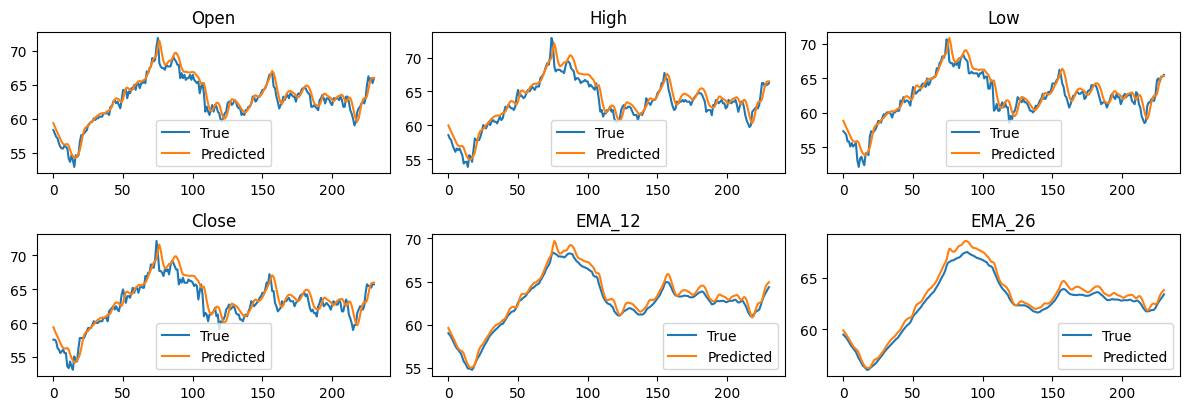

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

prediction_columns = ['Open', 'High', 'Low', 'Close'] + [f'EMA_{period}' for period in ema_periods]
dataset = df[prediction_columns].values

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Define the sequence length for input data and future prediction
sequence_length = 60

# Create sequences for training
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i, :])
    y.append(scaled_data[i, :])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=len(prediction_columns)))
model.compile(optimizer='adam', loss='mean_squared_error')

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the model
batch_size = 32
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=1)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
for i, col in enumerate(prediction_columns):
    plt.subplot(3, 3, i + 1)
    plt.plot(y_test[:, i], label='True')
    plt.plot(predictions[:, i], label='Predicted')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


# **Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Calculate the percentage of correct predictions within a certain threshold
threshold = 0.02  # You can adjust this threshold as needed

correct_predictions = np.abs(predictions - y_test) / y_test < threshold
accuracy = np.mean(correct_predictions) * 100

print(f"Prediction Accuracy: {accuracy:.2f}%")

Mean Squared Error (MSE): 0.8764
Root Mean Squared Error (RMSE): 0.9362
Mean Absolute Error (MAE): 0.7115
Mean Absolute Percentage Error (MAPE): 1.1387%
Prediction Accuracy: 85.86%


# **Prediction the next 7-day price(the latest date based on dataset)**

In [ ]:
# Predict the future prices for the next 7 days
future_predictions = []
last_sequence = X_test[-1]

for _ in range(7):
    prediction = model.predict(np.array([last_sequence]))
    future_predictions.append(prediction[0])
    last_sequence = np.vstack((last_sequence[1:], prediction[0]))

# Inverse transform the future predictions to original scale
future_predictions = scaler.inverse_transform(future_predictions)

# Get the latest date in your 'df' as 'last_date'
last_date = df['Date'].iloc[-1]

# Calculate the date range for the next 7 days
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=7, freq='D')

# Create a new DataFrame for future predictions
future_df = pd.DataFrame(data=future_predictions, columns=prediction_columns, index=future_dates)


future_df.reset_index(inplace=True)
future_df.rename(columns={'index': 'Date'}, inplace=True)


1/1 [==============================] - 0s 32ms/step


# **Prediction Price and EMA values**

In [ ]:
future_df

,Date,Open,High,Low,Close,EMA_12,EMA_26
0,2023-08-31,65.977698,66.500629,65.332262,65.986345,64.912589,63.823421
1,2023-09-01,65.986866,66.546186,65.345352,66.010782,65.076058,64.003719
2,2023-09-02,66.051589,66.646028,65.416252,66.092519,65.263218,64.218148
3,2023-09-03,66.169864,66.793954,65.540723,66.228032,65.469906,64.455484
4,2023-09-04,66.338731,66.984743,65.714478,66.412985,65.693724,64.707249
5,2023-09-05,66.554486,67.214016,65.933151,66.642630,65.933526,64.967766
6,2023-09-06,66.810888,67.476087,66.190329,66.910070,66.187857,65.233180


# **Merge table to real value**

In [ ]:
extended_df = pd.concat([df, future_df])
extended_df.reset_index(drop=True, inplace=True)
extended_df

,Date,Open,High,Low,Close,EMA_12,EMA_26
0,2018-08-30,63.475161,63.475161,62.558552,62.787704,62.787704,62.787704
1,2018-08-31,62.329406,62.558558,61.641949,61.871101,62.646689,62.719808
2,2018-09-03,61.871094,62.787703,61.871094,62.100246,62.562621,62.673914
3,2018-09-04,62.100253,62.329405,61.412796,61.412796,62.385724,62.580498
4,2018-09-05,61.183641,61.412793,59.350423,59.808727,61.989263,62.375182
...,...,...,...,...,...,...,...
1215,2023-09-02,66.051589,66.646028,65.416252,66.092519,65.263218,64.218148
1216,2023-09-03,66.169864,66.793954,65.540723,66.228032,65.469906,64.455484
1217,2023-09-04,66.338731,66.984743,65.714478,66.412985,65.693724,64.707249
1218,2023-09-05,66.554486,67.214016,65.933151,66.642630,65.933526,64.967766


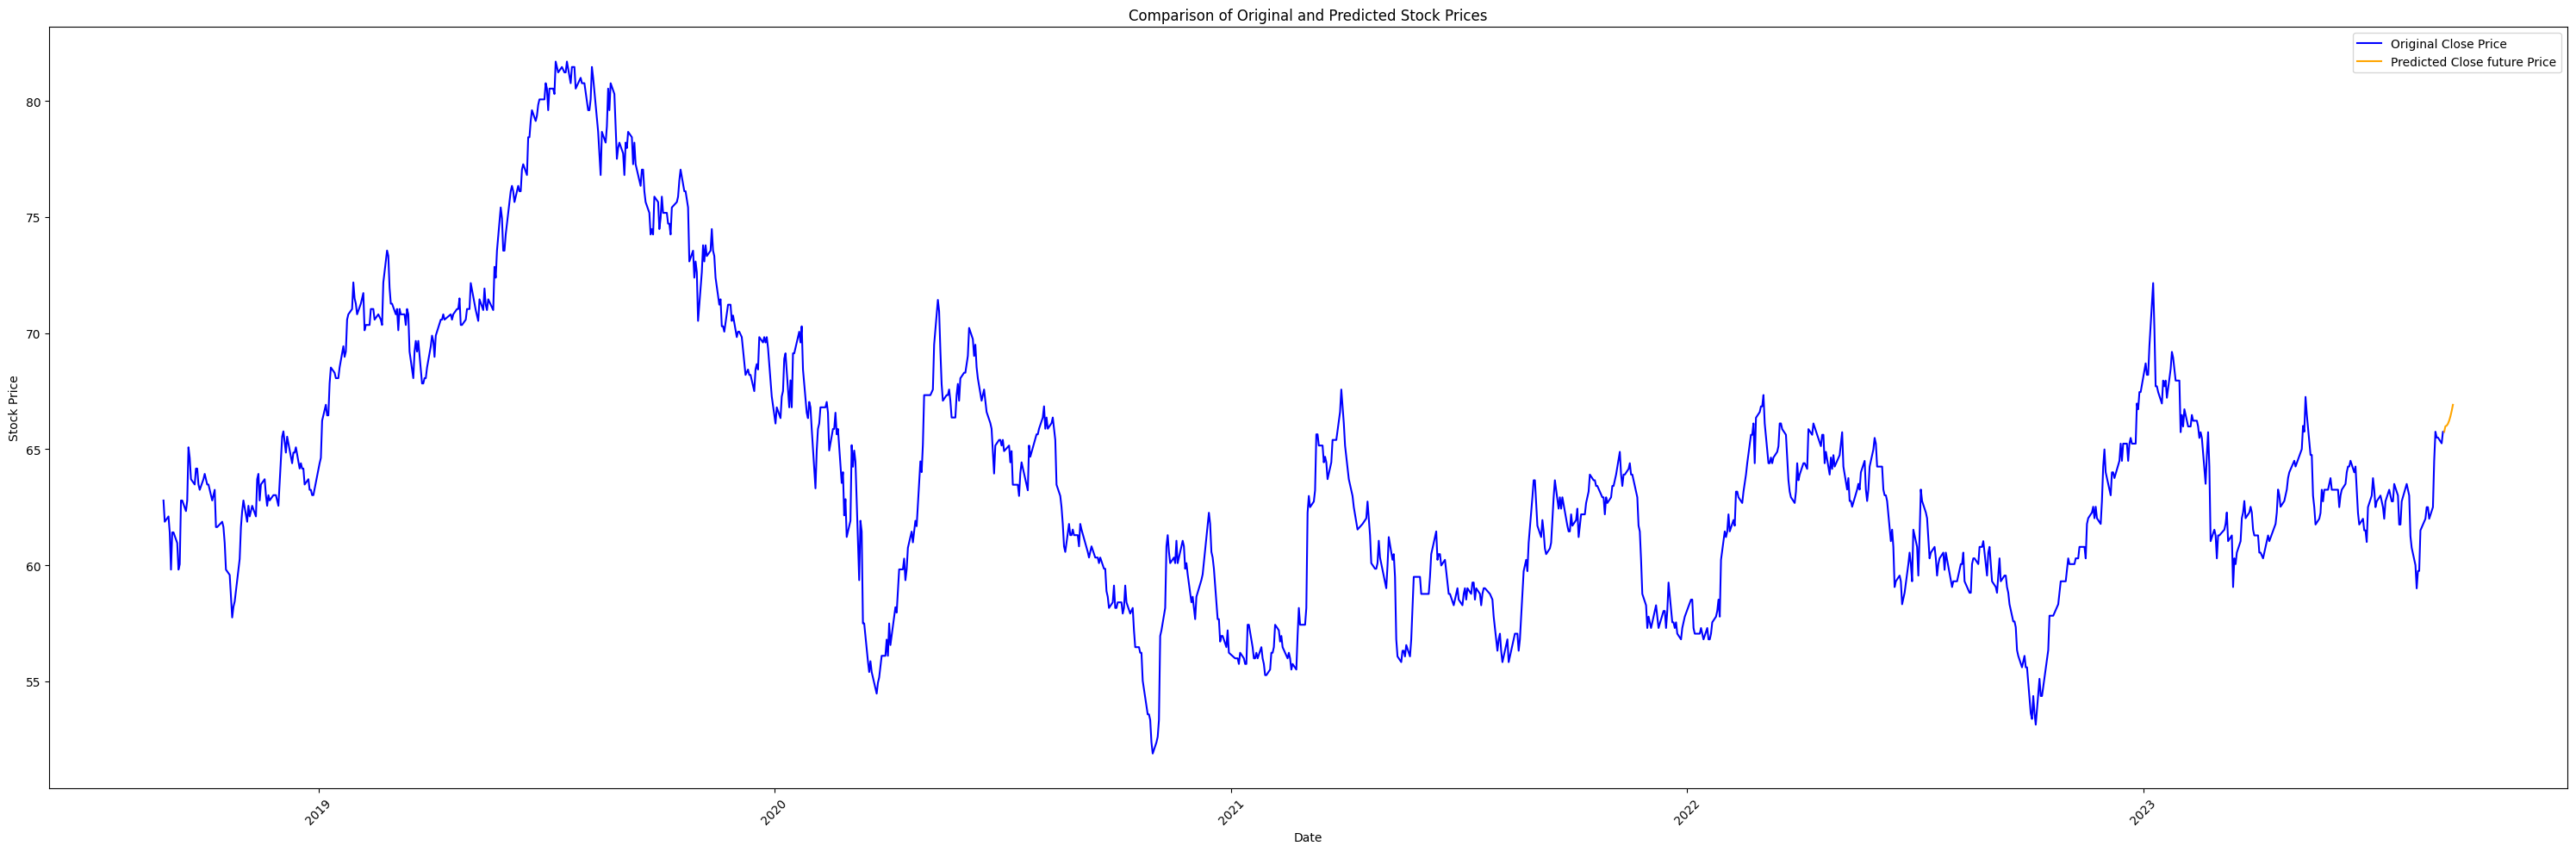

In [ ]:

link_row = df.iloc[-1:]

future_link = pd.concat([link_row,future_df]).reset_index(drop=True)

# Plot the original and predicted stock prices
plt.figure(figsize=(30, 10))

# Plot the original 'Close' prices
plt.plot(df['Date'], df['Close'], label='Original Close Price', color='blue')


# Plot the predicted 'Close' prices
plt.plot(future_link['Date'], future_link['Close'], label='Predicted Close future Price', color='orange')




plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Comparison of Original and Predicted Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Calculate indicator**

# MACD

EMA(12) - EMA(26)

“Bullish MACD” (จังหวะเข้าซื้อ) = เส้น MACD ตัดขึ้นไปอยู่เหนือ Signal line

“Bearish MACD” (จังหวะเตือนขายออก) = เส้น MACD ตัดลงมาอยู่ใต้เส้น Signal line
# RSI

RSI 14 = 100 –(100/(1+RS))

RS = Average Gain in 14 days /Average Loss in 14 day

RSI < 30  = สภาวะ Oversold  (สัญญาณซื้อ)

RSI > 70  = สภาวะ Overbought (สัญญาณขาย)

# Stochastic Oscillator

%K คือเส้น Stochastic

ค่า %K คำนวณจาก [(C – L14) / (H14 – L14)]*100
C คือ ราคาปิด ณ ปัจจุบัน วันนั้นๆ
L14 คือ จุดต่ำสุดในรอบ 14 วัน
H14 คือ จุดสูงสุดในรอบ 14 วัน

%D คือเส้นค่าเฉลี่ยของ %K ใช้ period เป็น 3 (ค่า %k เฉลี่ย ย้อนหลัง 3 วัน)

%K > 80  = สภาวะ Overbought

   เมื่อ %K ตัดลงมาต่ำกว่า % D และเกิดขึ้นที่ Overbought อาจเป็นสัญญาณขาย

%K < 20  = สภาวะ Oversold
   
  ถ้า %K ตัดขึ้นเหนือ % D ขึ้นไปและเกิดขึ้นที่ Oversold อาจเป็น สัญญาณซื้อ





In [ ]:
# Calculate EMA, MACD, RSI, and Stochastic Oscillator

pd.options.mode.chained_assignment = None

extended_df['EMA12'] = extended_df['Close'].ewm(span=12, min_periods=1, adjust=False).mean()
extended_df['EMA26'] = extended_df['Close'].ewm(span=26, min_periods=1, adjust=False).mean()


extended_df['MACD'] = extended_df['EMA12'] - extended_df['EMA26']
extended_df['Signal_Line'] = extended_df['MACD'].ewm(span=9, min_periods=1, adjust=False).mean()

delta =extended_df['Close'].diff()

# Define the period for the rolling average
period = 14

# Calculate the average gain and average loss for the specified period
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(period).mean()
avg_loss = loss.rolling(period).mean()

# Calculate the Relative Strength (RS) by dividing the average gain by the average loss
rs = avg_gain / avg_loss

# Calculate the Relative Strength Index (RSI)
rsi = 100 - (100 / (1 + rs))

# Add the RSI to the dataframe
extended_df['RSI'] = rsi

extended_df['%K'] = (extended_df['Close'] - extended_df['Low'].rolling(window=14).min()) / (extended_df['High'].rolling(window=14).max() - extended_df['Low'].rolling(window=14).min()) * 100
extended_df['%D'] = extended_df['%K'].rolling(window=3).mean()

# Define a function to determine trading signals
def determine_signals(row):
    macd_signal = 'Hold'
    macd_condition = '-'
    rsi_signal = 'Hold'
    rsi_condition = '-'
    stochastic_signal = 'Hold'
    stochastic_condition = '-'

    if row.name > 0:  # Check if it's not the first row

        if (row['MACD'] > row['Signal_Line']) and (row.shift(1)['MACD'] <= row.shift(1)['Signal_Line']):
            macd_signal = 'Buy'
            macd_condition = 'Bullish'
        elif (row['MACD'] < row['Signal_Line']) and (row.shift(1)['MACD'] >= row.shift(1)['Signal_Line']):
            macd_signal = 'Sell'
            macd_condition = 'Bearish'

        if row['RSI'] < 30:
            rsi_signal = 'Buy'
            rsi_condition = 'Oversold'
        elif row['RSI'] > 70:
            rsi_signal = 'Sell'
            rsi_condition = 'Overbought'

        if row['%K'] < 20 :
            stochastic_condition = 'Oversold'
            if row['%K'] >= row['%D'] :
              stochastic_signal = 'Buy'

        elif row['%K'] > 80 :
            stochastic_condition = 'Overbought'
            if row['%K'] <= row['%D']:
              stochastic_signal = 'Sell'


    return macd_signal, macd_condition, rsi_signal, rsi_condition, stochastic_signal, stochastic_condition

# Apply the function to each row
extended_df['MACD_Signal'], extended_df['MACD_Condition'], extended_df['RSI_Signal'], extended_df['RSI_Condition'], extended_df['Stochastic_Signal'], extended_df['Stochastic_Condition'] = zip(*extended_df.apply(determine_signals, axis=1))

# Drop rows with missing values
extended_df = extended_df.dropna(axis=0)






# Visualization : ราคาและ indicator ต่างๆ โดยภาพรวมทั้งหมด

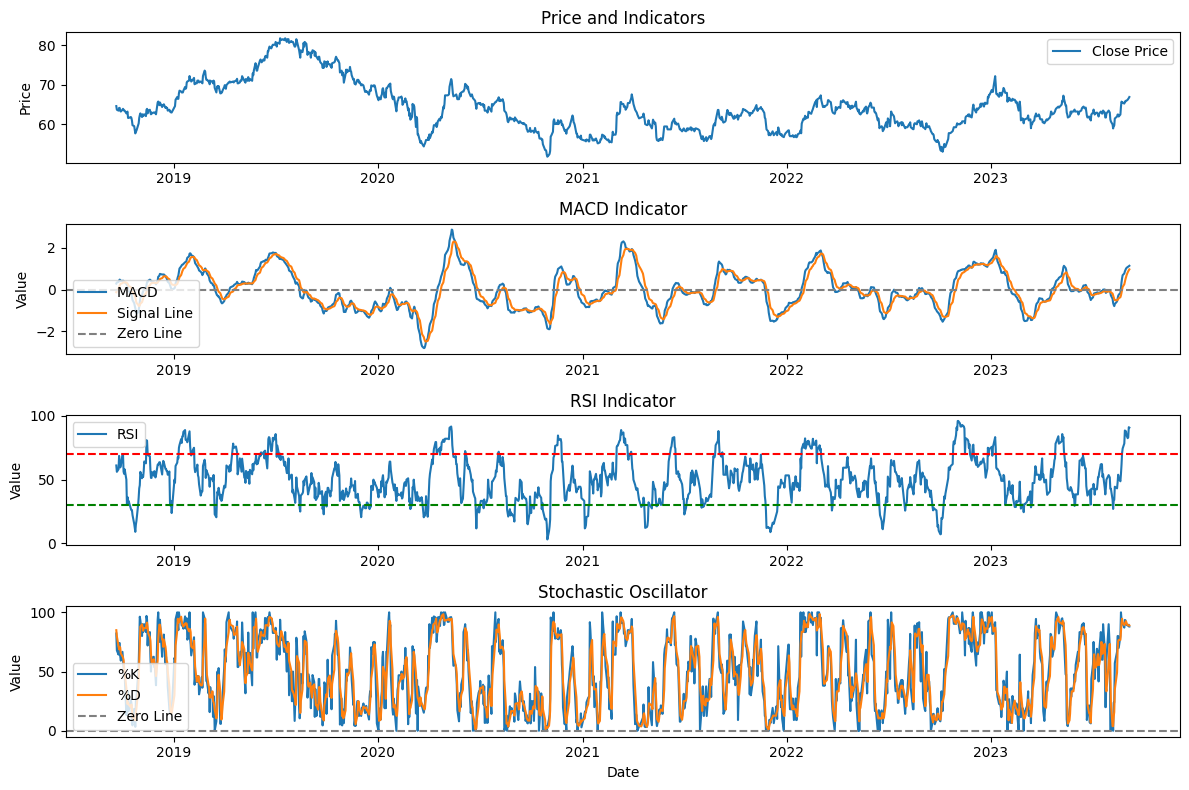

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 8))



plt.subplot(4, 1, 1)
plt.plot(extended_df['Date'], extended_df['Close'], label='Close Price')
plt.title('Price and Indicators')
plt.ylabel('Price')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(extended_df['Date'], extended_df['MACD'], label='MACD')
plt.plot(extended_df['Date'], extended_df['Signal_Line'], label='Signal Line')
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')  # Add zero line for MACD
plt.title('MACD Indicator')
plt.ylabel('Value')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(extended_df['Date'], extended_df['RSI'], label='RSI')
plt.axhline(y=70, color='red', linestyle='--')  # Add line at y=70
plt.axhline(y=30, color='green', linestyle='--')  # Add line at y=30
plt.title('RSI Indicator')
plt.ylabel('Value')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(extended_df['Date'], extended_df['%K'], label='%K')
plt.plot(extended_df['Date'], extended_df['%D'], label='%D')
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


# Visualization : ราคาและ indicator ต่างๆแบบเจาะลึก (เฉพาะปีล่าสุด, สามารถเลือกปีได้)

In [ ]:
import plotly.graph_objs as go
import plotly.subplots as sp

# Filter data for the latest year
latest_year_df = extended_df[extended_df['Date'].dt.year == extended_df['Date'].dt.year.max()]

# Create subplots with independent y-axis range
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True,vertical_spacing=0.02, subplot_titles=[
    'Close Price', 'MACD Indicator', 'RSI Indicator', 'Stochastic Oscillator'
])

# Add traces for each subplot
fig.add_trace(go.Scatter(x=latest_year_df['Date'], y=latest_year_df['Close'], name='Close Price'), row=1, col=1)
fig.add_trace(go.Scatter(x=latest_year_df['Date'], y=latest_year_df['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=latest_year_df['Date'], y=latest_year_df['Signal_Line'], name='Signal Line'), row=2, col=1)
fig.add_trace(go.Scatter(x=latest_year_df['Date'], y=latest_year_df['RSI'], name='RSI'), row=3, col=1)
fig.add_trace(go.Scatter(x=latest_year_df['Date'], y=latest_year_df['%K'], name='%K'), row=4, col=1)
fig.add_trace(go.Scatter(x=latest_year_df['Date'], y=latest_year_df['%D'], name='%D'), row=4, col=1)

# Set fixed y-axis range for each subplot
fig.update_yaxes(row=1, col=1, range=[latest_year_df['Close'].min() -10, latest_year_df['Close'].max()+10], fixedrange=True)
fig.update_yaxes(row=2, col=1, range=[min(latest_year_df['MACD'].min() -0.5, latest_year_df['Signal_Line'].min()-0.5),
                                      max(latest_year_df['MACD'].max()+0.5, latest_year_df['Signal_Line'].max())+0.5], fixedrange=True)
fig.update_yaxes(row=3, col=1, range=[latest_year_df['RSI'].min() - 20, latest_year_df['RSI'].max()+20], fixedrange=True)
fig.update_yaxes(row=4, col=1, range=[min(latest_year_df['%K'].min()-10, latest_year_df['%D'].min()-10),
                                      max(latest_year_df['%K'].max()+10, latest_year_df['%D'].max())+10], fixedrange=True)

# Add zero lines and horizontal lines
fig.update_traces(selector=dict(type='scatter'), mode='lines+markers')
fig.update_layout(
    showlegend=True,
    xaxis_rangeslider_visible=False
)
fig.update_layout(height=1000)
# Add zero line for MACD
fig.update_layout(shapes=[
    dict(type="line", x0=latest_year_df['Date'].iloc[0], x1=latest_year_df['Date'].iloc[-1], y0=0, y1=0, xref="x1", yref="y2",
         line=dict(color="gray", dash="dash")),
])

# Add RSI threshold lines
fig.add_shape(
    type='line', x0=latest_year_df['Date'].iloc[0], x1=latest_year_df['Date'].iloc[-1], y0=30, y1=30,
    xref="x1", yref="y3", line=dict(color="green", dash="dash")
)
fig.add_shape(
    type='line', x0=latest_year_df['Date'].iloc[0], x1=latest_year_df['Date'].iloc[-1], y0=70, y1=70,
    xref="x1", yref="y3", line=dict(color="red", dash="dash")
)

# Show the interactive plot
fig.show()


# Visualization : ราคาและ indicator ต่างๆแบบเจาะลึกเฉพาะราคาล่วงหน้าที่ predict ไว้

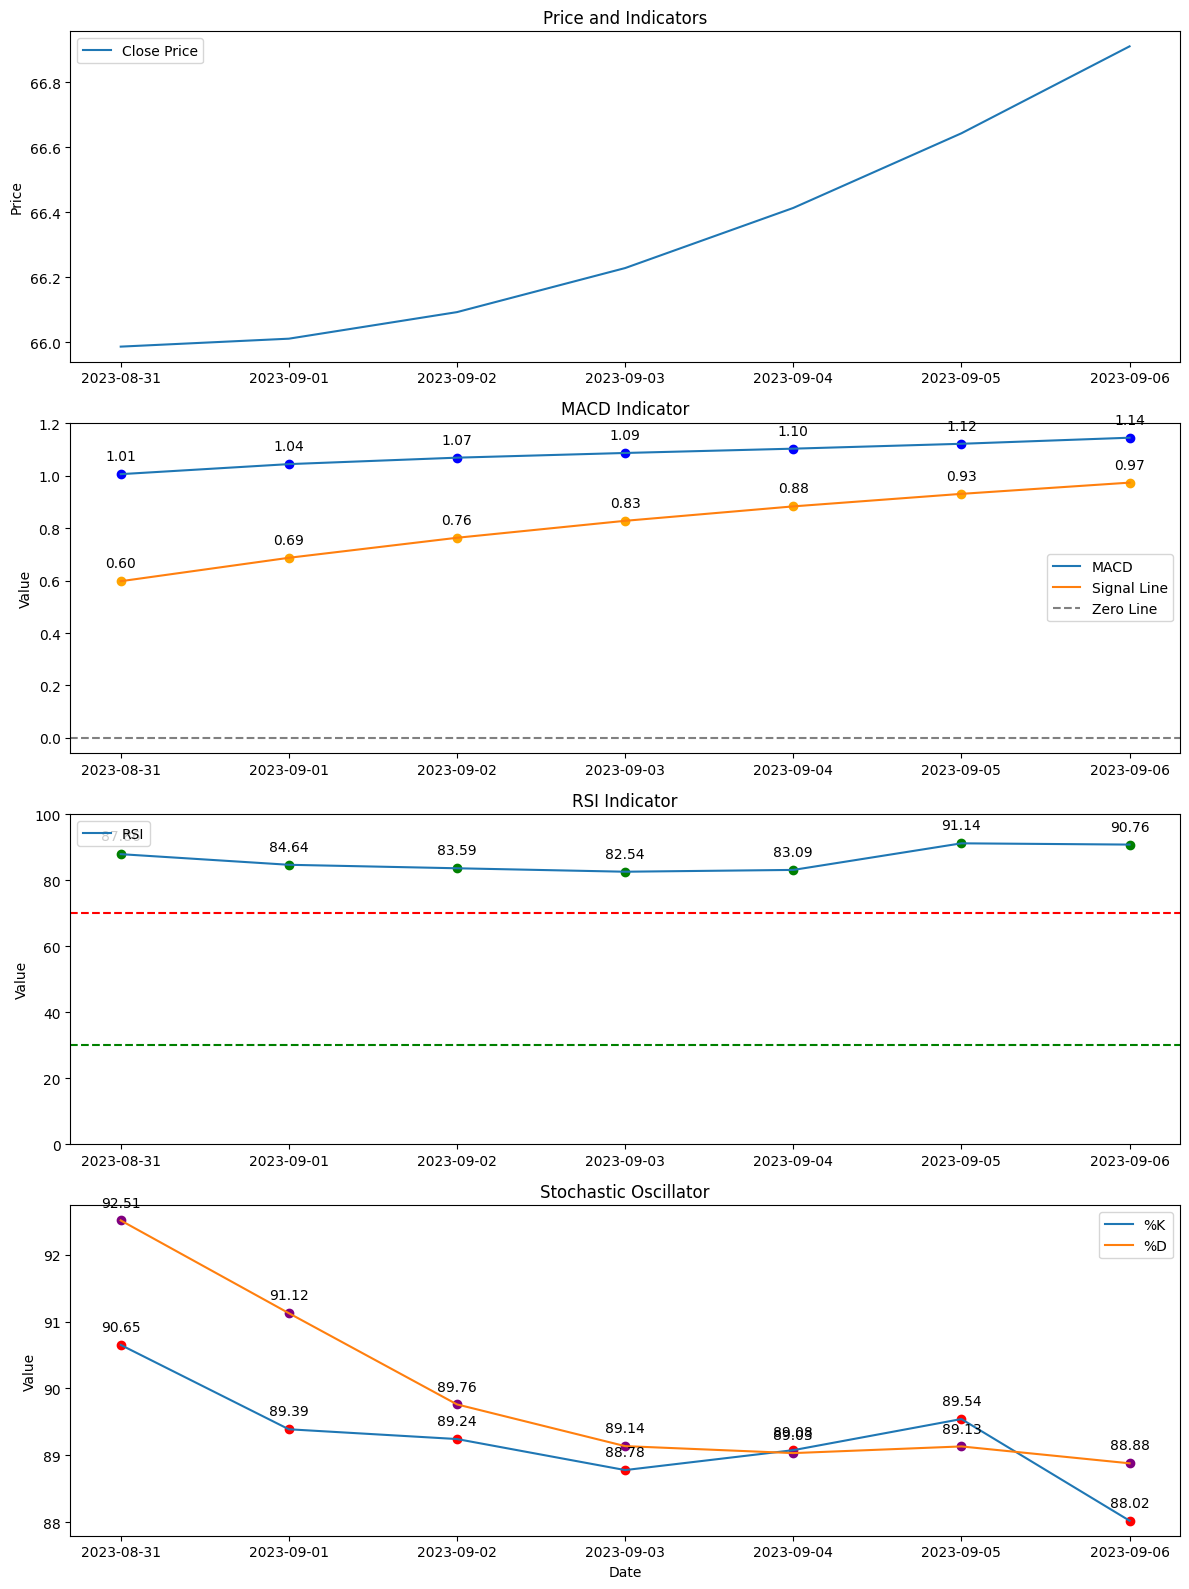

In [ ]:
import matplotlib.pyplot as plt

futuredate = future_df['Date'].iloc[0]
result = extended_df[extended_df['Date'] >= futuredate]

plt.figure(figsize=(12, 16))  # Increase the figure height for larger subplots

plt.subplot(4, 1, 1)
plt.subplots_adjust(top=0.95)  # Add space between title and plot
plt.plot(result['Date'], result['Close'], label='Close Price')
plt.title('Price and Indicators')
plt.ylabel('Price')
plt.legend()

plt.subplot(4, 1, 2)
plt.subplots_adjust(top=0.95)  # Add space between title and plot
plt.plot(result['Date'], result['MACD'], label='MACD')
plt.plot(result['Date'], result['Signal_Line'], label='Signal Line')
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')
plt.scatter(result['Date'], result['MACD'], color='blue', marker='o')
plt.scatter(result['Date'], result['Signal_Line'], color='orange', marker='o')
for i, value in enumerate(result['MACD']):
    plt.annotate(f'{value:.2f}', (result['Date'].iloc[i], value), textcoords="offset points", xytext=(0, 10), ha='center')
for i, value in enumerate(result['Signal_Line']):
    plt.annotate(f'{value:.2f}', (result['Date'].iloc[i], value), textcoords="offset points", xytext=(0, 10), ha='center')
plt.title('MACD Indicator')
plt.ylabel('Value')
plt.legend()

plt.subplot(4, 1, 3)
plt.subplots_adjust(top=0.95)  # Add space between title and plot
plt.plot(result['Date'], result['RSI'], label='RSI')
plt.axhline(y=70, color='red', linestyle='--')
plt.axhline(y=30, color='green', linestyle='--')
plt.ylim(0, 100)
plt.scatter(result['Date'], result['RSI'], color='green', marker='o')
for i, value in enumerate(result['RSI']):
    plt.annotate(f'{value:.2f}', (result['Date'].iloc[i], value), textcoords="offset points", xytext=(0, 10), ha='center')
plt.title('RSI Indicator')
plt.ylabel('Value')
plt.legend()

plt.subplot(4, 1, 4)
plt.subplots_adjust(top=0.95, bottom=0.1)  # Add space between title and plot, and between plots
plt.plot(result['Date'], result['%K'], label='%K')
plt.plot(result['Date'], result['%D'], label='%D')
plt.scatter(result['Date'], result['%K'], color='red', marker='o')
plt.scatter(result['Date'], result['%D'], color='purple', marker='o')
for i, value in enumerate(result['%K']):
    plt.annotate(f'{value:.2f}', (result['Date'].iloc[i], value), textcoords="offset points", xytext=(0, 10), ha='center')
for i, value in enumerate(result['%D']):
    plt.annotate(f'{value:.2f}', (result['Date'].iloc[i], value), textcoords="offset points", xytext=(0, 10), ha='center')
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


“Bullish MACD” (จังหวะเข้าซื้อ) = เส้น MACD ตัดขึ้นไปอยู่เหนือ Signal line

“Bearish MACD” (จังหวะเตือนขายออก) = เส้น MACD ตัดลงมาอยู่ใต้เส้น Signal line

RSI < 30  = สภาวะ Oversold  (สัญญาณซื้อ)

RSI > 70  = สภาวะ Overbought (สัญญาณขาย)

%K > 80  = สภาวะ Overbought

   เมื่อ %K ตัดลงมาต่ำกว่า % D และเกิดขึ้นที่ Overbought ราคามีแนวโน้มต่ำลง อาจเป็นสัญญาณขาย

%K < 20  = สภาวะ Oversold
   
  ถ้า %K ตัดขึ้นเหนือ % D ขึ้นไปและเกิดขึ้นที่ Oversold อาจเป็น ราคามีแนวโน้มเพิ่มขึ้น สัญญาณซื้อ

# **สัญญาณซิ้อ-ขายและภาวะต่างๆจาก indicator แต่ละตัว**

# **เฉพาะราคาที่ predict ล่วงหน้่า**

In [ ]:
result

,Date,Open,High,Low,Close,EMA_12,EMA_26,EMA12,EMA26,MACD,Signal_Line,RSI,%K,%D,MACD_Signal,MACD_Condition,RSI_Signal,RSI_Condition,Stochastic_Signal,Stochastic_Condition
1213,2023-08-31,65.977698,66.500629,65.332262,65.986345,64.912589,63.823421,64.598086,63.592856,1.005230,0.597321,87.858692,90.650454,92.510725,Hold,-,Sell,Overbought,Sell,Overbought
1214,2023-09-01,65.986866,66.546186,65.345352,66.010782,65.076058,64.003719,64.815424,63.771962,1.043462,0.686549,84.640861,89.389921,91.124569,Hold,-,Sell,Overbought,Sell,Overbought
1215,2023-09-02,66.051589,66.646028,65.416252,66.092519,65.263218,64.218148,65.011900,63.943855,1.068045,0.762848,83.586429,89.243958,89.761444,Hold,-,Sell,Overbought,Sell,Overbought
1216,2023-09-03,66.169864,66.793954,65.540723,66.228032,65.469906,64.455484,65.198997,64.113053,1.085944,0.827467,82.541996,88.780186,89.138022,Hold,-,Sell,Overbought,Sell,Overbought
1217,2023-09-04,66.338731,66.984743,65.714478,66.412985,65.693724,64.707249,65.385764,64.283418,1.102346,0.882443,83.088067,89.077618,89.033921,Hold,-,Sell,Overbought,Hold,Overbought
1218,2023-09-05,66.554486,67.214016,65.933151,66.642630,65.933526,64.967766,65.579128,64.458175,1.120954,0.930145,91.138884,89.542742,89.133515,Hold,-,Sell,Overbought,Hold,Overbought
1219,2023-09-06,66.810888,67.476087,66.190329,66.910070,66.187857,65.233180,65.783889,64.639797,1.144092,0.972935,90.757976,88.023564,88.881308,Hold,-,Sell,Overbought,Sell,Overbought


# **ข้อมูลรายการทั้งหมด**

In [ ]:

extended_df

,Date,Open,High,Low,Close,EMA_12,EMA_26,EMA12,EMA26,MACD,Signal_Line,RSI,%K,%D,MACD_Signal,MACD_Condition,RSI_Signal,RSI_Condition,Stochastic_Signal,Stochastic_Condition
15,2018-09-20,65.537535,65.537535,64.620926,64.620926,62.739672,62.448192,62.739672,62.448192,0.291480,-0.123955,61.111115,82.142851,84.920632,Hold,-,Hold,-,Sell,Overbought
16,2018-09-21,64.391776,64.620928,63.475167,63.704319,62.888080,62.541239,62.888080,62.541239,0.346841,-0.029796,56.140382,67.857174,79.761915,Hold,-,Hold,-,Hold,-
17,2018-09-24,63.475174,63.933478,63.246022,63.475174,62.978402,62.610419,62.978402,62.610419,0.367983,0.049760,58.181856,64.285859,71.428628,Hold,-,Hold,-,Hold,-
18,2018-09-25,63.704309,64.620917,63.704309,64.162613,63.160588,62.725397,63.160588,62.725397,0.435192,0.126846,68.627471,74.073933,68.738989,Hold,-,Hold,-,Hold,-
19,2018-09-26,64.620917,65.079222,64.162613,64.162613,63.314746,62.831857,63.314746,62.831857,0.482889,0.198055,63.636360,74.073933,70.811242,Hold,-,Hold,-,Hold,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,2023-09-02,66.051589,66.646028,65.416252,66.092519,65.263218,64.218148,65.011900,63.943855,1.068045,0.762848,83.586429,89.243958,89.761444,Hold,-,Sell,Overbought,Sell,Overbought
1216,2023-09-03,66.169864,66.793954,65.540723,66.228032,65.469906,64.455484,65.198997,64.113053,1.085944,0.827467,82.541996,88.780186,89.138022,Hold,-,Sell,Overbought,Sell,Overbought
1217,2023-09-04,66.338731,66.984743,65.714478,66.412985,65.693724,64.707249,65.385764,64.283418,1.102346,0.882443,83.088067,89.077618,89.033921,Hold,-,Sell,Overbought,Hold,Overbought
1218,2023-09-05,66.554486,67.214016,65.933151,66.642630,65.933526,64.967766,65.579128,64.458175,1.120954,0.930145,91.138884,89.542742,89.133515,Hold,-,Sell,Overbought,Hold,Overbought


In [ ]:
extended_df.to_csv('Stock Price Prediction and Signal.csv', index=False)